In [1]:
# Importing all essential liabraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install missingno

In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")

,count,mean,std,min,25%,50%,75%,max
charges,1338.000000,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000


In [6]:
#Getting all the unique values in each feature
features = data.columns
for feature in features:
    print(f"{feature} ---> {data[feature].nunique()}")

age ---> 47
sex ---> 2
bmi ---> 548
children ---> 6
smoker ---> 2
region ---> 4
charges ---> 1337


In [7]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [8]:
data[['sex','smoker']].value_counts()

sex     smoker
female  no        547
male    no        517
        yes       159
female  yes       115
dtype: int64

In [9]:
data[['smoker','region']].value_counts()

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
dtype: int64

* Observations

* There are total of 662 females and 676 males in data.
* Male smokers 159 female smokers 115 
* There are a total of 9336 (1338 x 7) observations .
* There are less no. of people with more no. of dependents/children(4,5)
* There are more no. of smokers in southeast region

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

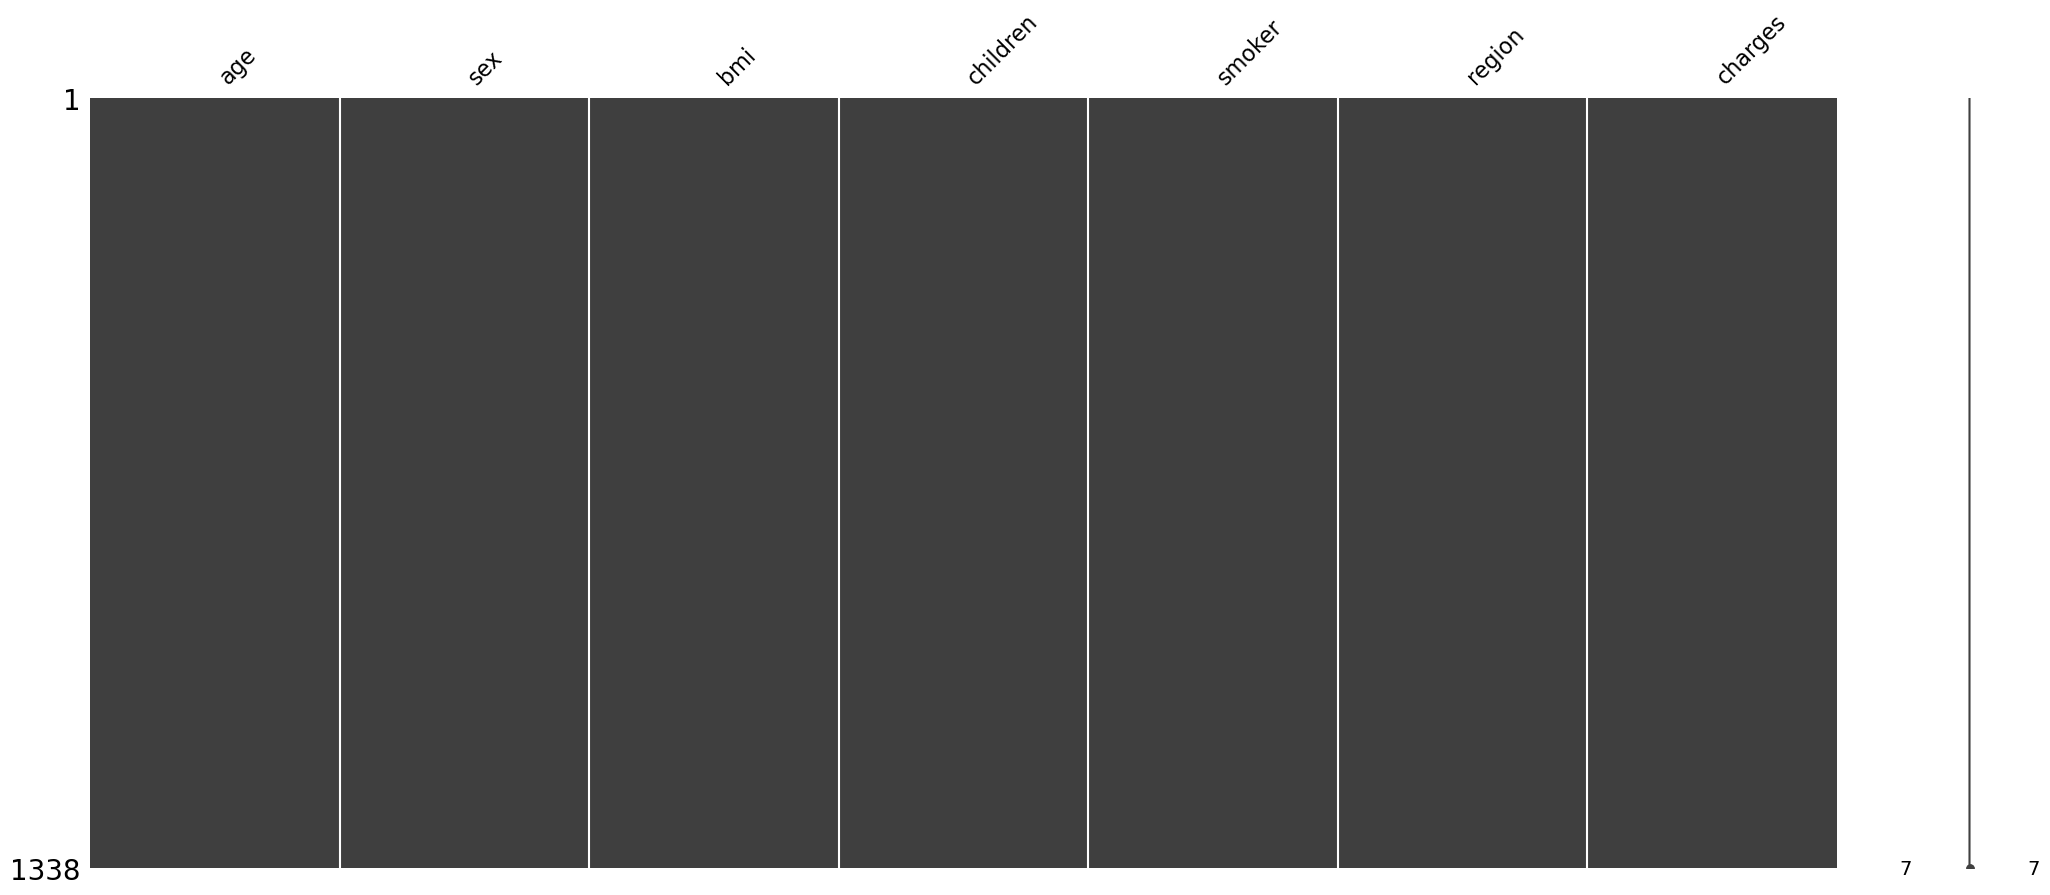

In [11]:
msno.matrix(data) # find the pattern of missingness in the dataset

In [12]:
data.groupby(by=['smoker','sex','region']).mean()  ## charges are higher in smoking people

age        bmi  children       charges
smoker sex    region                                                 
no     female northeast  39.840909  29.777462  0.954545   9640.426984
              northwest  39.755556  29.488704  1.177778   8786.998679
              southeast  39.071942  32.780000  1.079137   8440.205552
              southwest  40.099291  30.050355  1.134752   8234.091260
       male   northeast  39.216000  28.861760  1.144000   8664.042222
              northwest  38.568182  28.930379  1.060606   8320.689321
              southeast  38.261194  34.129552  1.052239   7609.003587
              southwest  40.277778  31.019841  1.119048   7778.905534
yes    female northeast  38.724138  27.261724  1.241379  28032.046398
              northwest  38.827586  28.296897  0.827586  29670.824946
              southeast  39.250000  32.251389  0.944444  33034.820716
              southwest  37.047619  30.128571  1.047619  31687.988430
       male   northeast  37.868421  29.560000  0.894737  30926.252583
              northwest  39.827586  29.983966  1.724138  30713.181419
              southeast  40.054545  33.650000  1.036364  36029.839367
              southwest  35.567568  31.502703  1.297297  32598.862854

In [13]:
sum(data.children)

1465

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis :

In [15]:
mean_data =  data.groupby('sex')[features].mean().sort_values(by = "bmi",ascending = False)

In [16]:
mean_data.style.background_gradient(cmap = "BuGn")

,age,bmi,children,charges
sex,,,,
male,38.917160,30.943129,1.115385,13956.751178
female,39.503021,30.377749,1.074018,12569.578844


* as here in both males and females mean bmi is above 30 ... which shows that there are more people who are obese in both categories

In [17]:
max_data =  data.groupby('sex')[features].max().sort_values(by = "age",ascending = False)
max_data.style.background_gradient(cmap = "BuGn")

,age,sex,bmi,children,smoker,region,charges
sex,,,,,,,
female,64,female,48.070000,5,yes,southwest,63770.428010
male,64,male,53.130000,5,yes,southwest,62592.873090


<AxesSubplot:xlabel='region', ylabel='count'>

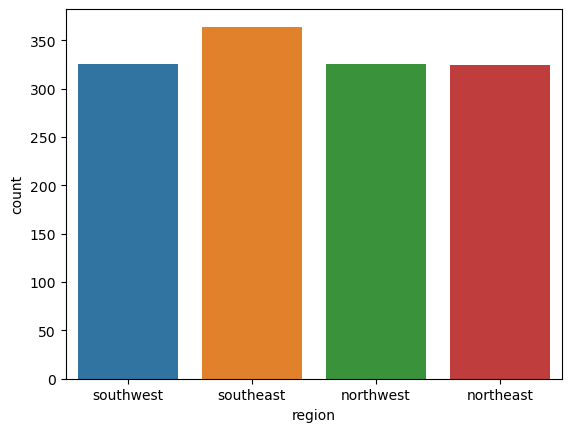

In [19]:
sns.countplot(data['region'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

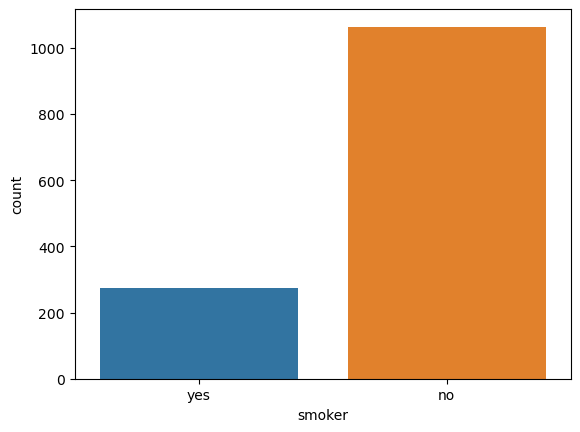

In [20]:
sns.countplot(data['smoker'])

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

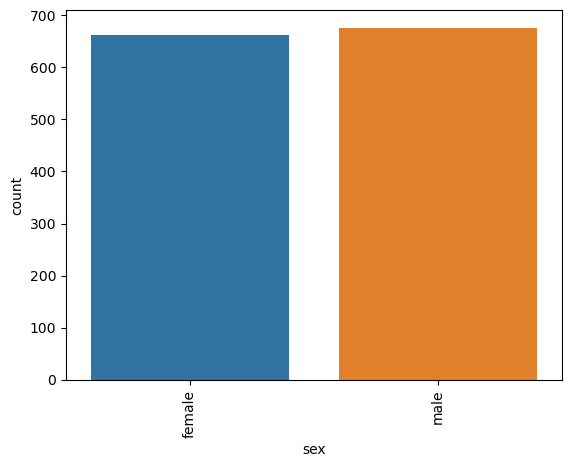

In [21]:
sns.countplot(data['sex'])
plt.xticks(rotation=90)

In [22]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

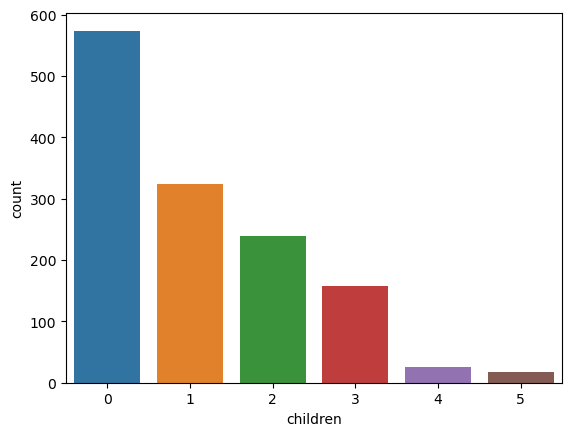

In [23]:
sns.countplot(data['children'])

In [24]:
df1 = data[data['smoker']=='yes']
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


<AxesSubplot:xlabel='charges'>

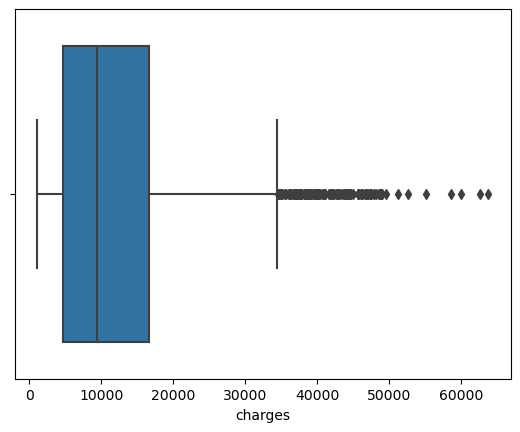

In [25]:
sns.boxplot(data['charges'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

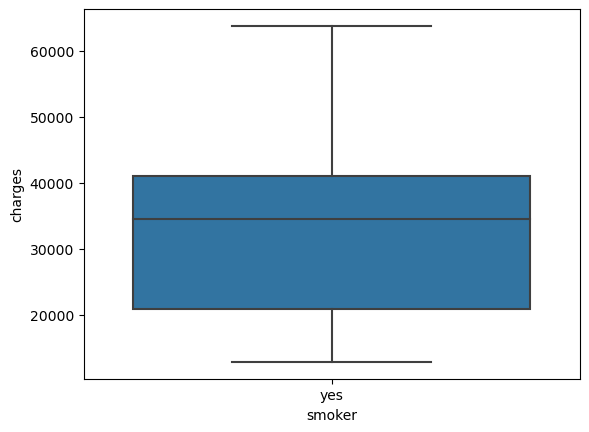

In [26]:
sns.boxplot(x=df1['smoker'],y=df1['charges'],data=df1)

In [27]:
df2 = data[data['smoker']=='no']
df2.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


<AxesSubplot:xlabel='smoker', ylabel='charges'>

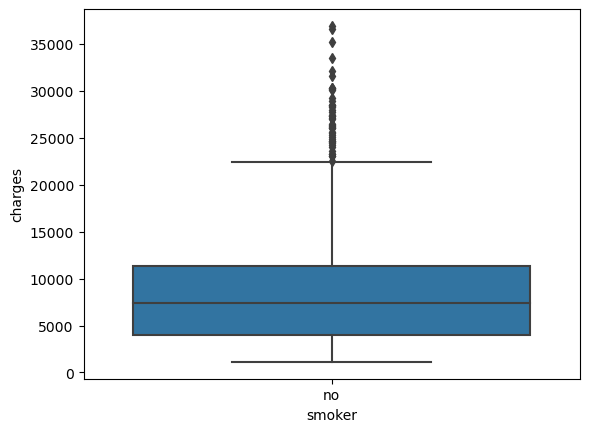

In [28]:
sns.boxplot(x=df2['smoker'],y=df2['charges'],data=df2)

- outliers are present in above chart on charges for non smokers

In [29]:
df2.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


### Outliers in  chart on charges for non smokers

Q1 (25%) = 3986.44
Q2 (50%) = 7345.4
Q3 (75%) = 11362.89

IQR = Q3 - Q1 = 7376.45
1.5*IQR = 11064.675

Range  (|Q1-1.5IQR| , |Q3+1.5IQR|)  =  (7078.235 , 22427.56)
Outliers are present after 22427.56  charges

#### Bivariate

<AxesSubplot:xlabel='region', ylabel='charges'>

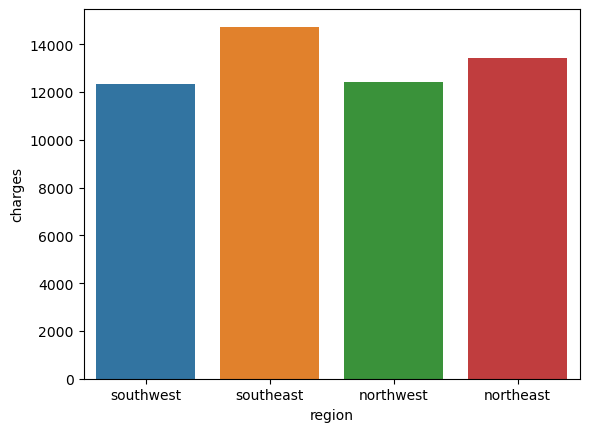

In [30]:
sns.barplot(x=data.region,y=data.charges,ci=None) # avg

<AxesSubplot:xlabel='smoker', ylabel='age'>

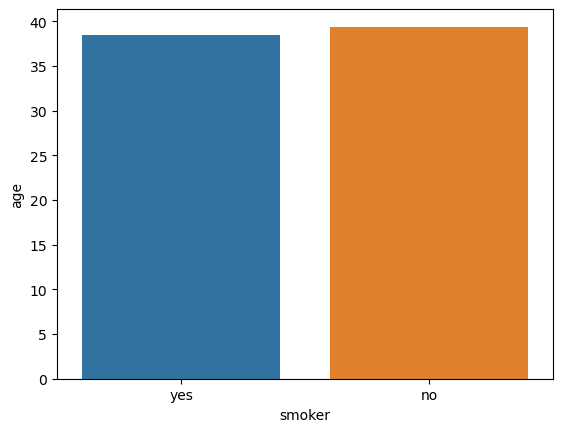

In [31]:
sns.barplot(x=data.smoker,y=data.age,ci=None)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

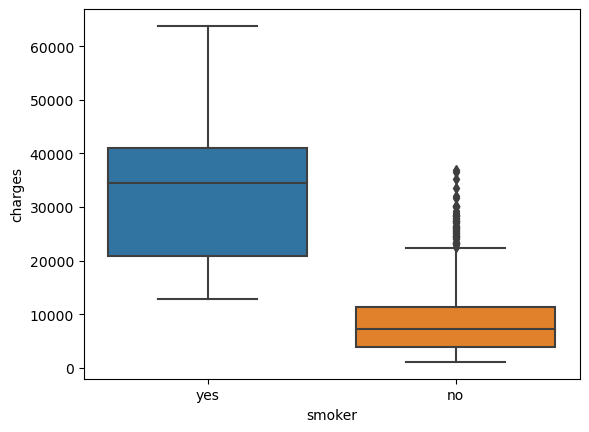

In [32]:
sns.boxplot(x=data['smoker'],y=data['charges'],data=data)

### Multivariate

<AxesSubplot:xlabel='age', ylabel='charges'>

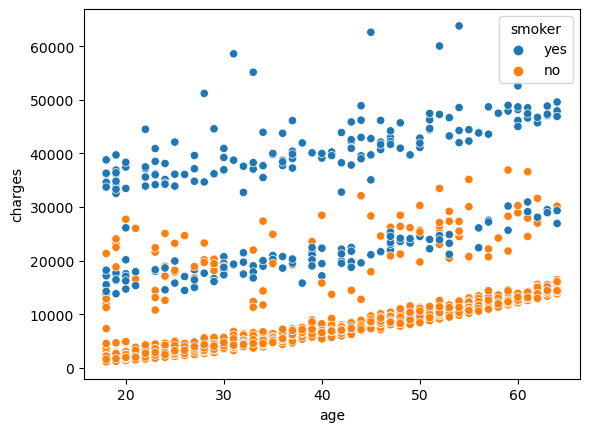

In [33]:
sns.scatterplot(data['age'],data['charges'],data['smoker'])

- charges are more in smoking people. There is no great change in charges with change in age

<AxesSubplot:xlabel='age', ylabel='charges'>

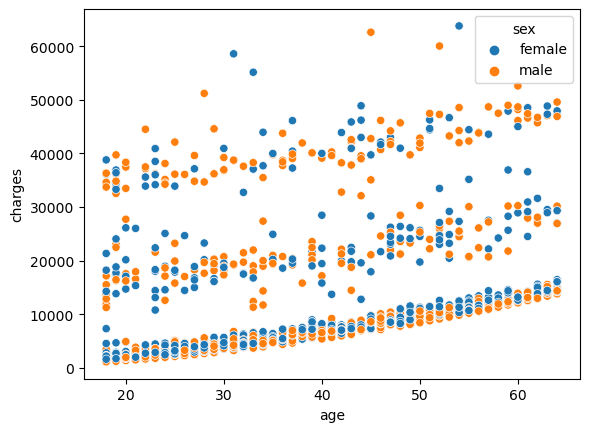

In [34]:
sns.scatterplot(data['age'],data['charges'],data['sex']) 
# - With gender and age there is no visible change in charges there are all kinds of charges in almost every age group

<AxesSubplot:xlabel='bmi', ylabel='charges'>

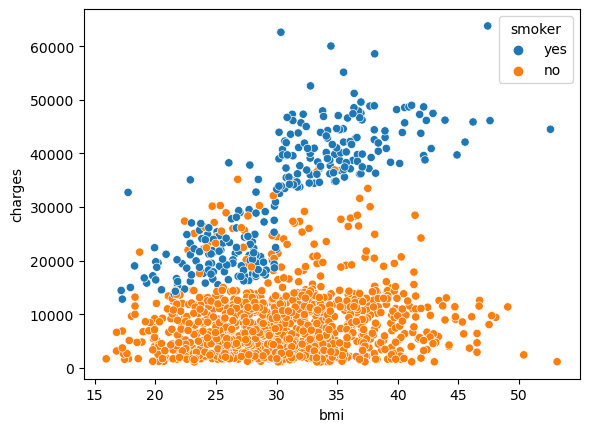

In [35]:
sns.scatterplot(data['bmi'],data['charges'],data['smoker'])  
# between 18.5 and 24.9 – This is described as the 'healthy range'. 
# between 25 and 29.9 – This is described as overweight. 
# between 30 and 39.9 – This is described as obesity.
# under 18.5 – This is described as underweight

- Count of People who are not smokers and underweight(with bmi < 18.5) is very few among which there are both somkers and non smokers and charges below around 45k
- Non smokers count is more than the smokers count .
- There are more people who are overweight and obese
- smokers have got more charges than non smokers

<AxesSubplot:xlabel='sex', ylabel='bmi'>

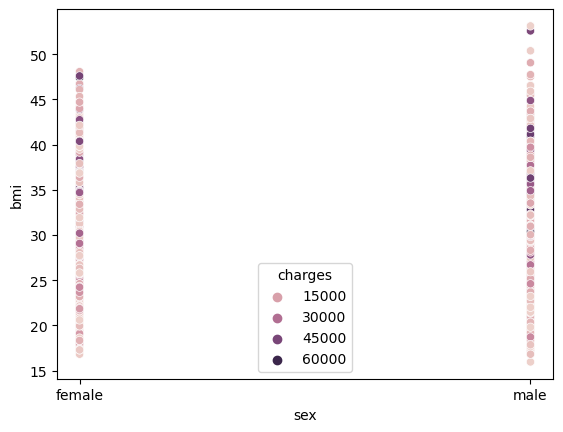

In [36]:
sns.scatterplot(data['sex'],data['bmi'],data['charges']) # no visible change in charges with bmi or gender

<AxesSubplot:xlabel='charges', ylabel='Density'>

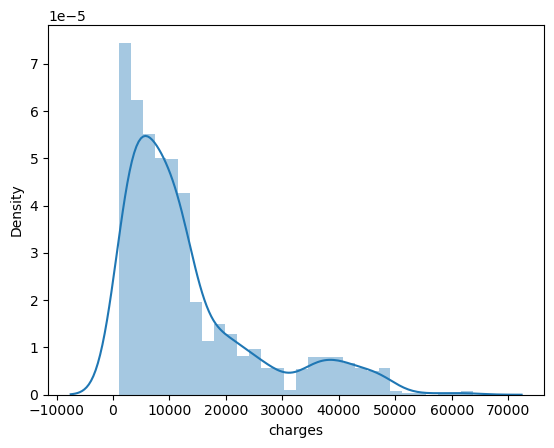

In [37]:
sns.distplot(data['charges'],kde=True)

<AxesSubplot:>

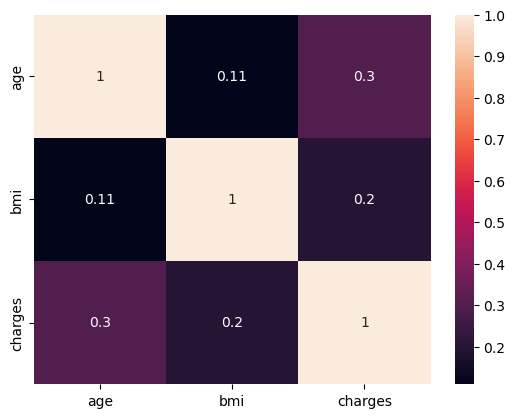

In [38]:
sns.heatmap(data[['age','bmi','charges']].corr(),annot=True)

 *  There is less relation among the above categories of insurance data

## Conclusion 

As seen from all above analysis :
-  The charges tend to change more based on whether the person is smoking or not rather than any other specification
-  Also here even if the people are having more bmi (>25 ) charges are less when they are not smokers
-  No. of dependents/children , age , bmi , gender all these factors does not seem to effect the charges much
-  Also more smoking people are present in southeast region compared to other regions

Therefore the insurance company can make more no. of smoking people take the insurance premium plans to put themselves in a position to make profits as higher hospitalization cost is also a important driver for the growth of the health insurance market in India.